In [19]:
import numpy as np
import matplotlib.pyplot as plt

(0.0, 2.0)

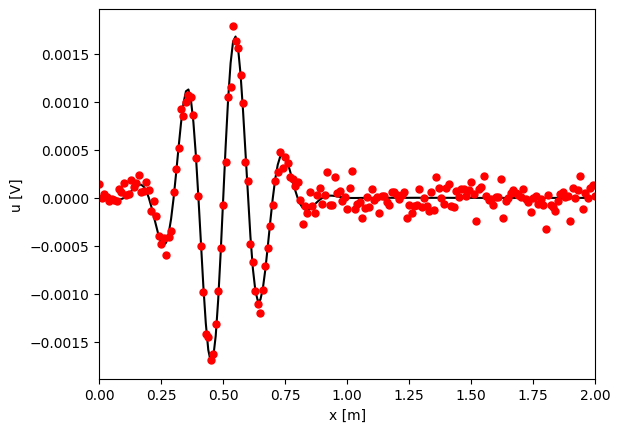

In [20]:
test = np.loadtxt("t50_npaths10e3.dat", dtype=float, delimiter=" ", usecols=([0,1,2]))

color_marker = "red"
marker_size = 5
plt.plot(test[:,0], test[:,2], 'k-')
plt.plot(test[:,0], test[:,1], 'o', color=color_marker, markersize = marker_size)
plt.xlabel("x [m]")
plt.ylabel("u [V]")
plt.xlim([0, 2])


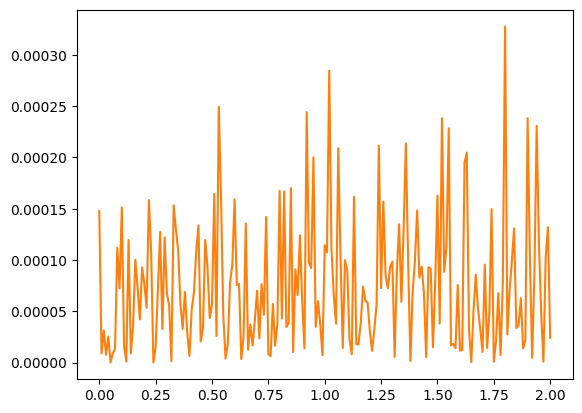

In [21]:
plt.plot(test[:,0], abs(test[:,1]-test[:,2]), '-', color="tab:orange")

In [22]:
names = []

for i_t in [10, 15, 25, 35, 50]:
    for i_npaths in [3, 4, 5]:
        name = "t" + str(i_t) + "_npaths10e" + str(i_npaths) + ".dat"
        names.append(name)
print(names)

titles = []
for i_t in [10, 15, 25, 35, 50]:
    for i_npaths in [3, 4, 5]:
        titles.append([i_npaths, i_t])
print(titles)

datas = []
for x in range(1,16):
    datas.append(np.loadtxt(names[x-1], dtype=float, delimiter=" ", usecols=([0,1,2])))

['t10_npaths10e3.dat', 't10_npaths10e4.dat', 't10_npaths10e5.dat', 't15_npaths10e3.dat', 't15_npaths10e4.dat', 't15_npaths10e5.dat', 't25_npaths10e3.dat', 't25_npaths10e4.dat', 't25_npaths10e5.dat', 't35_npaths10e3.dat', 't35_npaths10e4.dat', 't35_npaths10e5.dat', 't50_npaths10e3.dat', 't50_npaths10e4.dat', 't50_npaths10e5.dat']
[[3, 10], [4, 10], [5, 10], [3, 15], [4, 15], [5, 15], [3, 25], [4, 25], [5, 25], [3, 35], [4, 35], [5, 35], [3, 50], [4, 50], [5, 50]]


In [23]:
def sygnal_plot(data, title_data):
    color_marker = "red"
    marker_size = 5
    plt.plot(data[:,0], data[:,2], 'k-')
    plt.plot(data[:,0], data[:,1], 'o', color=color_marker, markersize = marker_size)
    plt.xlabel("x [m]", fontsize = 14)
    plt.ylabel("u [V]", fontsize = 14)
    plt.xlim([0, 2])
    title_str = r"t = " + str(title_data[1]) + r" ns, npaths = 10$^{" + str(title_data[0]) + r"}$"
    plt.title(title_str, fontsize = 18)

In [24]:
def roznica_plot(data, ymax_val):
    color_line = "tab:orange"
    plt.plot(data[:,0], abs(data[:,1] - data[:,2]), '-', color=color_line)
    plt.xlabel("x [m]", fontsize = 14)
    plt.ylabel(r"$\Delta$u [V]", fontsize = 14)
    plt.xlim([0, 2])
    plt.ylim([0, ymax_val])

In [25]:
def plot_calosc(datas, titles):
    plt.figure(figsize=(20,10), dpi=600)

    ymax = []
    for i in range(0,3):
        ymax.append(max(datas[i][:,1]-datas[i][:,2]))
    
    ymax_val = max(ymax)*1.15
    for i in range(1,4):
        plt.subplot(2,3,i)
        sygnal_plot(datas[i-1], titles[i-1])
        plt.subplot(2,3,i+3)
        roznica_plot(datas[i-1], ymax_val)

In [26]:
data = []

time = [10, 15, 25, 35, 50]
for i in range(0,5):
    dane = []
    tytuly = []
    it_start = 3*i
    it_stop = 3 + 3*i
    dane = datas[it_start:it_stop]
    tytuly = titles[it_start:it_stop]
    plot_calosc(dane, tytuly)
    file_name = "t" + str(time[i]) + "ns.png"
    plt.savefig(file_name, dpi=600, bbox_inches='tight')
    plt.show()

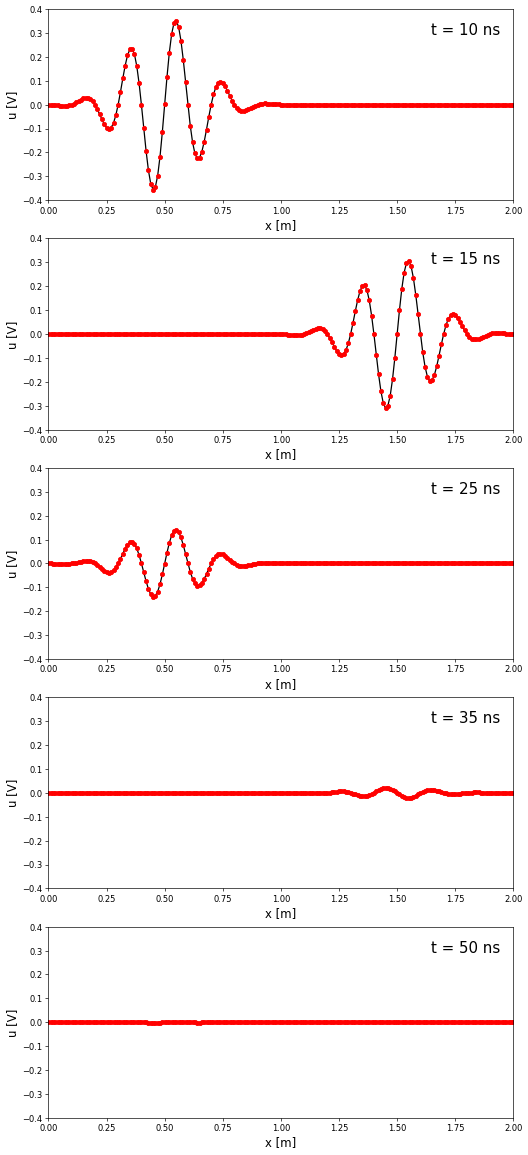

In [29]:
time = [10, 15, 25, 35, 50]

plt.figure(figsize=([10,24]), dpi=60)
for i in range(0,5):
    data = datas
    color_marker = "red"
    marker_size = 5
    label_str = "t = " + str(time[i]) + " ns"
    plt.subplot(5,1,i+1)
    plt.plot(data[2+3*i][:,0], data[2+3*i][:,2], 'k-')
    plt.plot(data[2+3*i][:,0], data[2+3*i][:,1], 'o', color=color_marker, markersize = marker_size, label = label_str)
    plt.xlabel("x [m]", fontsize = 14)
    plt.ylabel("u [V]", fontsize = 14)
    plt.xlim([0, 2])
    plt.ylim([-0.4, 0.4])
    plt.legend(fontsize = 18, frameon=False, markerscale=0, loc = 1)
plt.savefig("zestawienie.png", dpi=600, bbox_inches='tight')